In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [30]:
df = pd.read_csv("bank/bank-full.csv",sep=";")

In [31]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [32]:
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [33]:
my_columns = ['age', 'job', 'marital', 'education', 'balance', 'housing',
       'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y']

In [34]:
my_df = df[my_columns]

In [35]:
my_df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


In [37]:
my_df.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'y'],
      dtype='object')

In [38]:
my_df.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Question 1
What is the most frequent observation (mode) for the column education?

unknown
primary
secondary
tertiary

In [44]:
my_df.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Question 2
Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

age and balance
day and campaign
day and pdays
pdays and previous
Target encoding
Now we want to encode the y variable.
Let's replace the values yes/no with 1/0

In [46]:
my_df.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [47]:
numerical_df = my_df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_df.corr()

In [48]:
print(correlation_matrix)

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.009120 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.004648  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710  0.001203 -0.032855  0.454820  1.000000


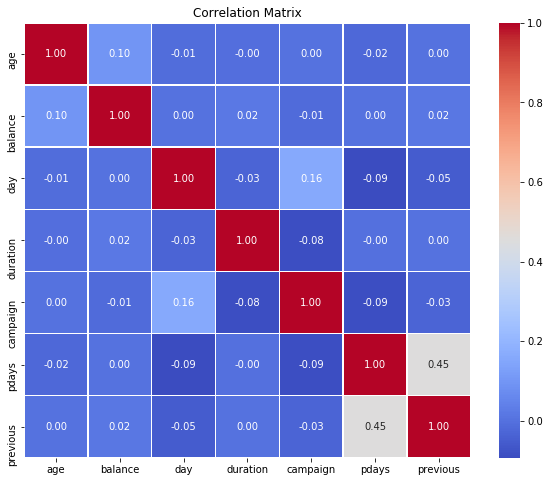

In [49]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [53]:
my_df['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [54]:
my_df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,0


Split the data
Split your data in train/val/test sets with 60%/20%/20% distribution.
Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
Make sure that the target value y is not in your dataframe.

In [90]:
from sklearn.model_selection import train_test_split

X = my_df.drop(columns=['y'])
y = my_df['y']

#keep the training set at 60% and rest as 40%
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Further split the temp set into validation (20%) and test (20%) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Total data size", len(X))
print("Train set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))



Total data size 45211
Train set size: 27126
Validation set size: 9042
Test set size: 9043


In [91]:
#Question 3
#Calculate the mutual information score between y and other categorical variables in the dataset. Use the training set only.
#Round the scores to 2 decimals using round(score, 2).
#Which of these variables has the biggest mutual information score?

#contact
#education
#housing
#poutcome



In [92]:
# All the categorical variables(objects) are not ordinal in nature and have very categories. Hence applying OHE for these categorial variables


In [93]:
X_train.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [94]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OneHotEncoder

X_train_Categorical = X_train.select_dtypes(include=['object']).columns

ohe = OneHotEncoder(sparse=False, drop='first')

X_train_encoded = ohe.fit_transform(X_train[X_train_Categorical])

X_encoded_df = pd.DataFrame(X_train_encoded, columns=ohe.get_feature_names(X_train_Categorical))

#X_encoded_df.head()

# Calculate mutual information scores
mi_scores = mutual_info_classif(X_train_encoded, y_train, discrete_features=True)

# Round the scores to 2 decimals
mi_scores_rounded = [round(score, 2) for score in mi_scores]

#print(mi_scores_rounded)

mi_scores_df = pd.DataFrame({
    'Feature': X_encoded_df.columns,
    'MI Score': mi_scores_rounded
})

print(mi_scores_df)

                Feature  MI Score
0       job_blue-collar      0.00
1      job_entrepreneur      0.00
2         job_housemaid      0.00
3        job_management      0.00
4           job_retired      0.00
5     job_self-employed      0.00
6          job_services      0.00
7           job_student      0.00
8        job_technician      0.00
9        job_unemployed      0.00
10          job_unknown      0.00
11      marital_married      0.00
12       marital_single      0.00
13  education_secondary      0.00
14   education_tertiary      0.00
15    education_unknown      0.00
16          housing_yes      0.01
17    contact_telephone      0.00
18      contact_unknown      0.01
19            month_aug      0.00
20            month_dec      0.00
21            month_feb      0.00
22            month_jan      0.00
23            month_jul      0.00
24            month_jun      0.00
25            month_mar      0.00
26            month_may      0.01
27            month_nov      0.00
28            

In [95]:
#Question 4
#Now let's train a logistic regression.
#Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
#Fit the model on the training dataset.
#To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
#model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
#Calculate the accuracy on the validation dataset and round it to 2 decimal digits.
#What accuracy did you get?

#0.6
#0.7
#0.8
#0.9

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#my_df.columns
X = my_df.drop(columns=['y'])
y = my_df['y']

# Seperate numerical and categorical columns

numerical_col = X.select_dtypes(exclude=['object']).columns
categorical_col = X.select_dtypes(include=['object']).columns

#One hot encode the categorical variables and form a dataframe

ohe = OneHotEncoder(sparse=False, drop='first')
X_encoded = ohe.fit_transform(X[categorical_col])

X_encoded_df = pd.DataFrame(X_encoded, columns=ohe.get_feature_names(categorical_col))

# Concatenate the numerical features and the encoded categorical features
X_combined = pd.concat([X[numerical_col].reset_index(drop=True), X_encoded_df.reset_index(drop=True)], axis=1)

X_combined.head()


,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,44,29,5,151,1,-1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,33,2,5,76,1,-1,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,47,1506,5,92,1,-1,0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,33,1,5,198,1,-1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [101]:
# Split the data into train, validation, and test sets (60%/20%/20%)
X_train, X_temp, y_train, y_temp = train_test_split(X_combined, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [102]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [103]:
# Predict on the validation set
y_val_pred = model.predict(X_val)

# Calculate the accuracy on the validation dataset
accuracy = accuracy_score(y_val, y_val_pred)

In [104]:
print(f'accuracy on validation set is {round(accuracy,2)}')

accuracy on validation set is 0.9


In [105]:
#Question 5
#Let's find the least useful feature using the feature elimination technique.
#Train a model with all these features (using the same parameters as in Q4).
#Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
#For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
#Which of following feature has the smallest difference?

#age
#balance
#marital
#previous
#Note: The difference doesn't have to be positive.

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = pd.read_csv("bank/bank-full.csv",sep=";")

my_columns = ['age', 'job', 'marital', 'education', 'balance', 'housing',
       'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y']

my_df = df[my_columns]

X = my_df.drop(columns=['y'])
y = my_df['y']

#split data into numerical and categorical columns

numerical_col = X.select_dtypes(exclude=['object']).columns
categorical_col = X.select_dtypes(include=['object']).columns


ohe = OneHotEncoder(sparse=False, drop='first')
X_encoded = ohe.fit_transform(X[categorical_col])

X_encoded_df = pd.DataFrame(X_encoded, columns=ohe.get_feature_names(categorical_col))

# Concatenate the numerical features and the encoded categorical features
X_combined = pd.concat([X[numerical_col].reset_index(drop=True), X_encoded_df.reset_index(drop=True)], axis=1)

X_combined.head()


# Split data into train, validation and test data in 60/20/20 proportion

X_train, X_temp, y_train, y_temp = train_test_split(X_combined, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

# Train with all features

model.fit(X_train, y_train)
y_pred = model.predict(X_val)
baseline_accuracy = accuracy_score(y_val, y_pred)
print(f'Baseline Accuracy: {baseline_accuracy}')

# List of features to exclude one by one
features = ['age', 'balance', 'previous', 'marital']

# Dictionary to store differences
differences = {}

# Iterate through each feature, remove it and train the model
for feature in features:
    if feature == 'marital':
        columns_to_drop = [col for col in X_train.columns if col.startswith('marital_')]
        
    else:
        columns_to_drop = [feature]
        
    # Drop the feature from the training and test set
    X_train_dropped = X_train.drop(columns=columns_to_drop)
    X_val_dropped = X_val.drop(columns=columns_to_drop)
    
    # Train the model without the feature
    model.fit(X_train_dropped, y_train)
    y_pred = model.predict(X_val_dropped)
    
    # Calculate the accuracy without the feature
    accuracy_without_feature = accuracy_score(y_val, y_pred)
    print(f'Accuracy without {feature}: {accuracy_without_feature}')
    
    # Calculate the difference
    difference = baseline_accuracy - accuracy_without_feature
    differences[feature] = difference

# Find the feature with the smallest difference
least_useful_feature = min(differences, key=differences.get)
print(f'Least useful feature: {least_useful_feature}, with difference: {differences[least_useful_feature]}')


Baseline Accuracy: 0.9010174740101747
Accuracy without age: 0.9007962840079629
Accuracy without balance: 0.900464499004645
Accuracy without previous: 0.900575094005751
Accuracy without marital: 0.9012386640123866
Least useful feature: marital, with difference: -0.00022119000221187957


In [113]:
#Question 6
#Now let's train a regularized logistic regression.
#Let's try the following values of the parameter C: [0, 0.01, 0.1, 1, 10].
#Train models using all the features as in Q4.
#Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

#Which of these C leads to the best accuracy on the validation set?
#0.01
#0.1
#1
#10
#100
#Note: If there are multiple options, select the smallest C.

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = pd.read_csv("bank/bank-full.csv",sep=";")

my_columns = ['age', 'job', 'marital', 'education', 'balance', 'housing',
       'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y']

my_df = df[my_columns]

X = my_df.drop(columns=['y'])
y = my_df['y']

#split data into numerical and categorical columns

numerical_col = X.select_dtypes(exclude=['object']).columns
categorical_col = X.select_dtypes(include=['object']).columns


ohe = OneHotEncoder(sparse=False, drop='first')
X_encoded = ohe.fit_transform(X[categorical_col])

X_encoded_df = pd.DataFrame(X_encoded, columns=ohe.get_feature_names(categorical_col))

# Concatenate the numerical features and the encoded categorical features
X_combined = pd.concat([X[numerical_col].reset_index(drop=True), X_encoded_df.reset_index(drop=True)], axis=1)

X_combined.head()


# Split data into train, validation and test data in 60/20/20 proportion

X_train, X_temp, y_train, y_temp = train_test_split(X_combined, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

accuracies = {}
# Initialize the logistic regression model
for c in [0.01, 0.1, 1, 10]:
    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000, penalty='l2', random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    my_accuracy = accuracy_score(y_val, y_pred)
    print(f'Accuracy with C {c}: {round(my_accuracy,3)}')
    accuracies[c] = round(my_accuracy,3)
    
# Print c with the best accuracy

max_accuracy = max(accuracies, key=accuracies.get)
print(accuracies)
print(max_accuracy)
print(f'C value of {max_accuracy}, has the maximum accuracy: {accuracies[max_accuracy]}')

Accuracy with C 0.01: 0.898
Accuracy with C 0.1: 0.9
Accuracy with C 1: 0.901
Accuracy with C 10: 0.9
{0.01: 0.898, 0.1: 0.9, 1: 0.901, 10: 0.9}
1
C value of 1, has the maximum accuracy: 0.901
